## AdaBoosting, Gradientboosting, XGBoosting Regressor

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [107]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [108]:
df.shape

(301, 9)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [110]:
df.isnull().any().any()

False

In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


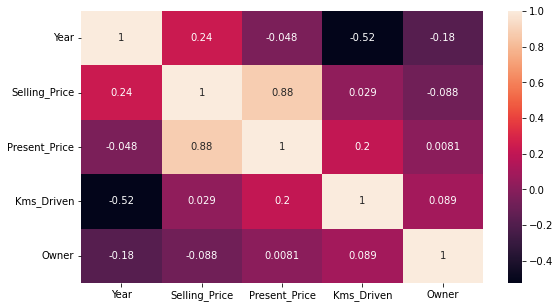

In [112]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [113]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [114]:
df["vehicle_age"]=2022-df.Year

In [115]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [116]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [117]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

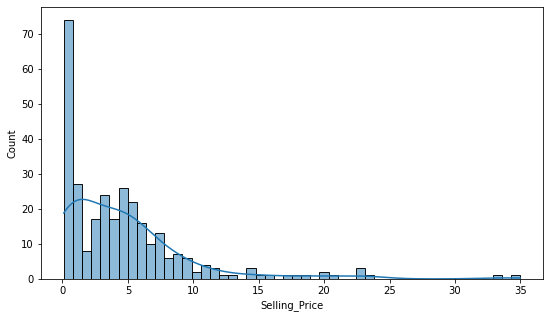

In [118]:
sns.histplot(df.Selling_Price, bins=50, kde=True)

<AxesSubplot:xlabel='Selling_Price'>

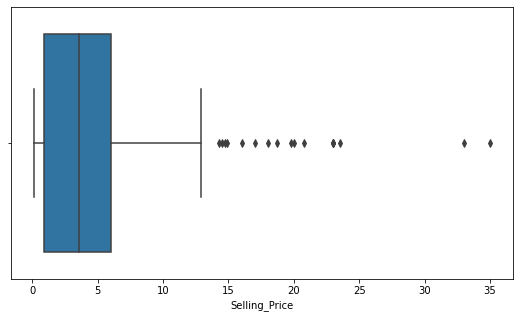

In [119]:
sns.boxplot(df.Selling_Price)

## Train test split

In [120]:
from sklearn.preprocessing import OrdinalEncoder

In [121]:
df_new = df[df.Selling_Price < 10]
df_new

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.590,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.540,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.850,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.150,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.870,42450,Diesel,Dealer,Manual,0,8
5,9.25,9.830,2071,Diesel,Dealer,Manual,0,4
6,6.75,8.120,18796,Petrol,Dealer,Manual,0,7
7,6.50,8.610,33429,Diesel,Dealer,Manual,0,7
8,8.75,8.890,20273,Diesel,Dealer,Manual,0,6
9,7.45,8.920,42367,Diesel,Dealer,Manual,0,7


In [122]:
X=df_new.drop("Selling_Price", axis=1)
y=df_new.Selling_Price

In [123]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=101)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (218, 7)
Train target shape   :  (218,)
Test features shape  :  (55, 7)
Test target shape    :  (55,)


## Modeling with Pipeline for Adaboost Regressor

In [124]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [125]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [126]:
cat = X.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [127]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [128]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor

#base_estimator=DecisionTreeRegressor(max_depth=3)
operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('Ada_model', AdaBoostRegressor(random_state=101))])

In [129]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.956000,0.957621
mae,0.425779,0.437001
mse,0.303520,0.346972
rmse,0.550927,0.589043


In [130]:
y_pred_ada = pipe_model.predict(X_test)
y_pred_ada

array([5.77972222, 5.54807692, 6.65247934, 7.22843137, 0.65454545,
       4.32162162, 4.715     , 6.65247934, 0.605     , 4.8297619 ,
       0.632     , 0.605     , 4.55238095, 0.588     , 1.20714286,
       3.48125   , 0.588     , 4.8297619 , 8.07236842, 1.2       ,
       0.605     , 0.632     , 8.22058824, 1.1625    , 1.16      ,
       1.20714286, 0.605     , 5.27323529, 0.605     , 5.77      ,
       0.605     , 5.27323529, 5.40448718, 7.81585366, 8.07236842,
       7.99830508, 1.20714286, 3.96079208, 0.588     , 3.01388889,
       4.6380303 , 1.2       , 5.54807692, 2.84615385, 5.54807692,
       0.605     , 0.65454545, 3.62688312, 2.9       , 4.55238095,
       6.87315385, 0.65454545, 0.605     , 7.18285714, 3.00222222])

In [131]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10, 
                        return_train_score=True)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                              0.911136
train_r2                             0.961428
test_neg_mean_absolute_error        -0.532090
train_neg_mean_absolute_error       -0.398900
test_neg_mean_squared_error         -0.580550
train_neg_mean_squared_error        -0.265936
test_neg_root_mean_squared_error    -0.745942
train_neg_root_mean_squared_error   -0.515505
dtype: float64

In [132]:
from sklearn.tree import plot_tree

In [133]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['ordinalencoder__Fuel_Type', 'ordinalencoder__Seller_Type',
       'ordinalencoder__Transmission', 'remainder__Present_Price',
       'remainder__Kms_Driven', 'remainder__Owner',
       'remainder__vehicle_age'], dtype=object)

In [134]:
new_features = [i.replace("ordinalencoder__","").replace("remainder__", "") for i in features]
new_features

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'vehicle_age']

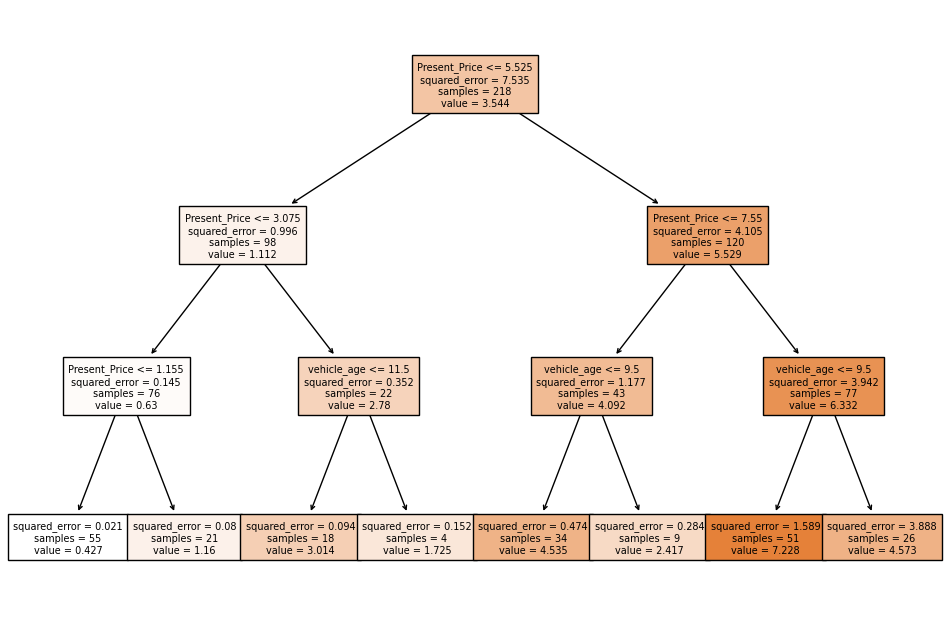

In [135]:
Ada_model = AdaBoostRegressor(n_estimators=3, random_state=101)

operations = [("OrdinalEncoder", column_trans), ("Ada_model", Ada_model)]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(12,8),dpi=100)
plot_tree(model["Ada_model"].estimators_[0], filled=True, feature_names=new_features, fontsize=7);

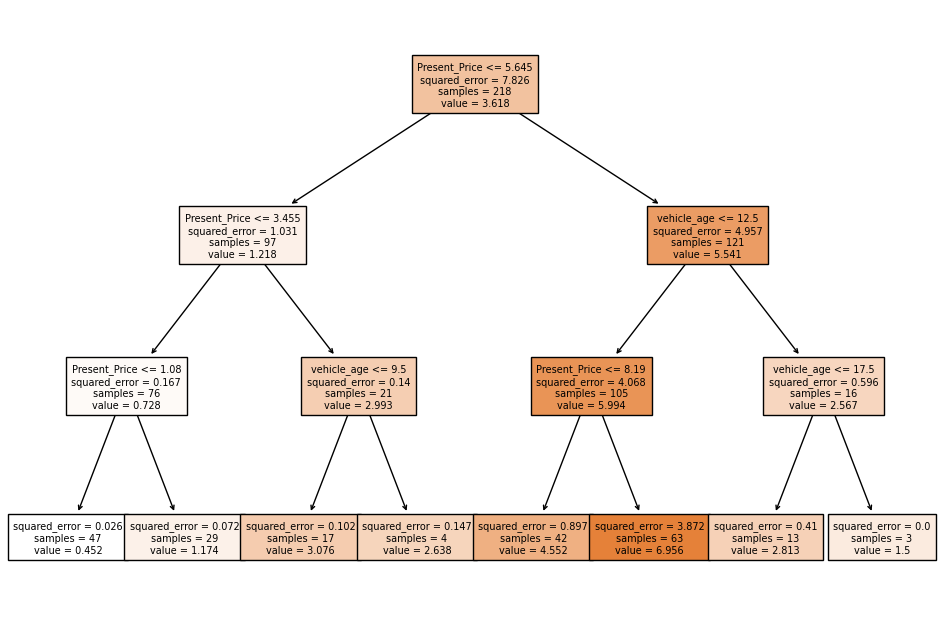

In [136]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(model["Ada_model"].estimators_[1], filled=True, feature_names=new_features, fontsize=7);

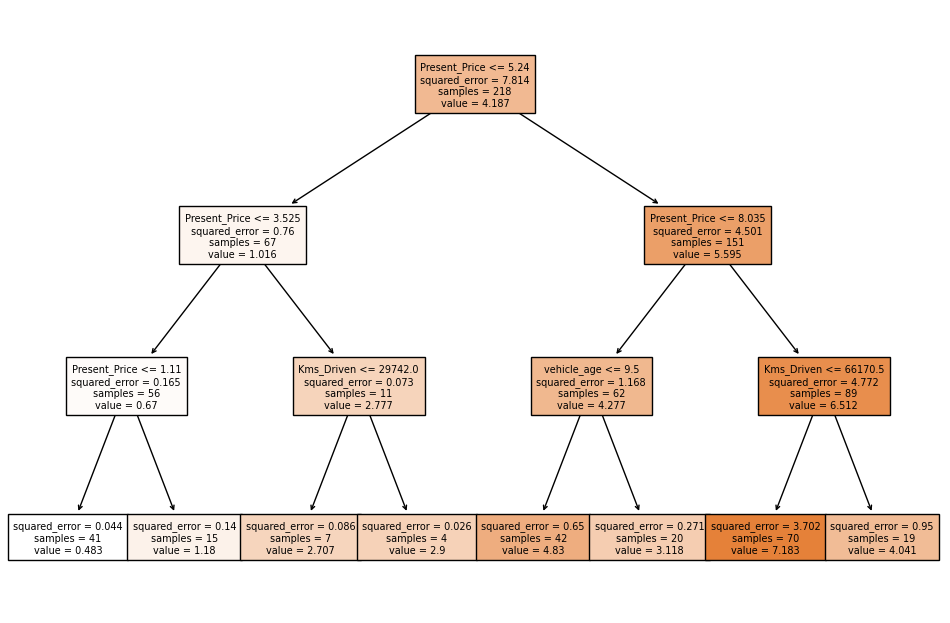

In [137]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(model["Ada_model"].estimators_[2], filled=True, feature_names=new_features, fontsize=7);

In [138]:
y_pred

array([7.18285714, 4.8297619 , 7.18285714, 7.18285714, 0.45191489,
       4.55238095, 4.55238095, 7.18285714, 0.45191489, 4.55238095,
       0.45191489, 0.45191489, 4.55238095, 0.45191489, 1.17448276,
       3.01388889, 0.45191489, 4.55238095, 7.18285714, 1.17448276,
       0.45191489, 0.45191489, 7.18285714, 1.17448276, 1.17448276,
       1.17448276, 0.45191489, 7.18285714, 0.45191489, 4.8297619 ,
       0.45191489, 7.18285714, 4.8297619 , 7.18285714, 7.18285714,
       7.18285714, 1.17448276, 3.1175    , 0.45191489, 3.01388889,
       4.55238095, 1.17448276, 4.8297619 , 3.1175    , 4.8297619 ,
       0.45191489, 0.45191489, 4.04105263, 2.9       , 4.55238095,
       7.18285714, 0.45191489, 0.45191489, 7.18285714, 2.9       ])

In [139]:
np.array(y_test)

array([6.  , 6.1 , 7.9 , 9.5 , 0.5 , 4.5 , 4.95, 6.95, 0.2 , 5.25, 0.25,
       0.75, 5.4 , 0.35, 1.75, 2.75, 0.6 , 5.5 , 6.7 , 1.2 , 0.75, 0.65,
       8.35, 0.65, 0.6 , 1.2 , 0.2 , 5.25, 0.4 , 5.25, 0.4 , 5.  , 4.5 ,
       7.5 , 8.99, 8.4 , 1.1 , 3.1 , 0.18, 2.55, 4.6 , 1.15, 4.75, 2.25,
       5.8 , 0.45, 0.5 , 3.  , 2.55, 4.5 , 7.45, 0.1 , 0.3 , 7.75, 2.35])

In [140]:
X_test.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
33,9.95,45000,Diesel,Dealer,Manual,0,8
13,7.71,26000,Petrol,Dealer,Manual,0,7
208,8.10,3435,Petrol,Dealer,Manual,0,5
296,11.60,33988,Diesel,Dealer,Manual,0,6
154,0.88,8000,Petrol,Individual,Manual,0,8


In [141]:
X_test.loc[[33]]

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
33,9.95,45000,Diesel,Dealer,Manual,0,8


## Gridsearch for Adaboosting

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
param_grid = {"Ada_model__n_estimators":[50,150],
              "Ada_model__learning_rate":[0.1, 0.5, 0.8, 1],
              "Ada_model__loss": ["linear", "square"]
            }

In [145]:
operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True)

In [146]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('Ada_model',
                                        AdaBoostRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'Ada_model__learning_rate': [0.1, 0.5, 0.8, 1],
                         'Ada_model__loss': ['linear', 'square'],
                         'Ada_model__n_estimators': [50, 150]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [147]:
grid_model.best_params_

{'Ada_model__learning_rate': 1,
 'Ada_model__loss': 'square',
 'Ada_model__n_estimators': 150}

In [148]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('Ada_model',
                 AdaBoostRegressor(learning_rate=1, loss='square',
                                   n_estimators=150, random_state=101))])

In [149]:
grid_model.best_index_

15

In [150]:
pd.DataFrame(grid_model.cv_results_).loc[15, ["mean_test_score", "mean_train_score"]]

mean_test_score    -0.708211
mean_train_score   -0.514725
Name: 15, dtype: object

In [151]:
grid_model.best_score_

-0.7082105623547165

In [152]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.957599,0.954322
mae,0.405756,0.455576
mse,0.292491,0.373979
rmse,0.540824,0.611538


## Feature importance

In [153]:
operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(loss='square', n_estimators=150,
                                                                                     random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('Ada_model',
                 AdaBoostRegressor(loss='square', n_estimators=150,
                                   random_state=101))])

In [154]:
pipe_model["Ada_model"].feature_importances_

array([0.09754105, 0.06543161, 0.00724716, 0.46527162, 0.11783252,
       0.00337024, 0.2433058 ])

In [155]:
imp_feats = pd.DataFrame(data=pipe_model["Ada_model"].feature_importances_,columns=['ada_Importance'], index=new_features)
ada_imp_feats = imp_feats.sort_values('ada_Importance', ascending=False)
ada_imp_feats

,ada_Importance
Present_Price,0.465272
vehicle_age,0.243306
Kms_Driven,0.117833
Fuel_Type,0.097541
Seller_Type,0.065432
Transmission,0.007247
Owner,0.003370


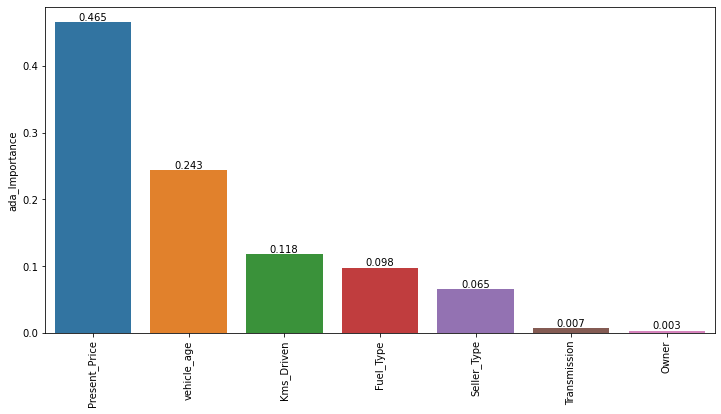

In [156]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=ada_imp_feats, x=ada_imp_feats.index, y='ada_Importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Modeling with Pipeline for Gradient Boosting Regressor

In [157]:
from sklearn.ensemble import GradientBoostingRegressor

operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('GB_model', GradientBoostingRegressor(random_state=101))])

In [158]:
# 100 -- 150 -- (-50) -- (-30) --> 150 + 0.1 * (-50) + 0.1*(-30)

# 200 -- 150 -- (50) -- (25)  --> 150 + 0.1 * 50 + 0.1*25

In [159]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.991287,0.966749
mae,0.171650,0.364139
mse,0.060105,0.272235
rmse,0.245162,0.521761


In [160]:
operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(random_state=101))]

model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10,
                       return_train_score=True)

pd.DataFrame(scores).mean()[2:]

test_r2                              0.934069
train_r2                             0.991771
test_neg_mean_absolute_error        -0.447367
train_neg_mean_absolute_error       -0.169185
test_neg_mean_squared_error         -0.423153
train_neg_mean_squared_error        -0.056686
test_neg_root_mean_squared_error    -0.629813
train_neg_root_mean_squared_error   -0.237743
dtype: float64

## Gridsearch for Gradientboosting

In [161]:
param_grid = {"GB_model__n_estimators":[50, 64], 
              "GB_model__subsample":[0.8, 1], 
              "GB_model__max_features" : [5,6],
              "GB_model__learning_rate": [0.02, 0.045], 
              'GB_model__max_depth':[1,2],
              'GB_model__min_samples_split':[2,3],
              'GB_model__min_samples_leaf':[1,2]}

In [162]:
operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True)

In [163]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('GB_model',
                                        GradientBoostingRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'GB_model__learning_rate': [0.02, 0.045],
                         'GB_model__max_depth': [1, 2],
                         'GB_model__max_features': [5, 6],
                         'GB_model__min_samples_leaf': [1, 2],
                         'GB_model__min_samples_split': [2, 3],
                         'GB_model__n_estimators': [50, 64],
                         'GB_model__subsample': [0.8, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [164]:
grid_model.best_params_

{'GB_model__learning_rate': 0.045,
 'GB_model__max_depth': 2,
 'GB_model__max_features': 6,
 'GB_model__min_samples_leaf': 1,
 'GB_model__min_samples_split': 2,
 'GB_model__n_estimators': 64,
 'GB_model__subsample': 0.8}

In [165]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('GB_model',
                 GradientBoostingRegressor(learning_rate=0.045, max_depth=2,
                                           max_features=6, n_estimators=64,
                                           random_state=101, subsample=0.8))])

In [166]:
grid_model.best_index_

114

In [167]:
pd.DataFrame(grid_model.cv_results_).loc[114, ["mean_test_score", "mean_train_score"]]

mean_test_score    -0.846911
mean_train_score   -0.676374
Name: 114, dtype: object

In [168]:
grid_model.best_score_

-0.8469105864607858

In [169]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.926287,0.943571
mae,0.501471,0.530018
mse,0.508485,0.462000
rmse,0.713081,0.679706


In [170]:
operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(learning_rate=0.045, max_depth=2, max_features=6,
                                                       n_estimators=64, random_state=101, subsample=0.8))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10,
                       return_train_score=True)
pd.DataFrame(scores).mean()[2:]

test_r2                              0.886390
train_r2                             0.931493
test_neg_mean_absolute_error        -0.611190
train_neg_mean_absolute_error       -0.492854
test_neg_mean_squared_error         -0.750108
train_neg_mean_squared_error        -0.472314
test_neg_root_mean_squared_error    -0.844747
train_neg_root_mean_squared_error   -0.686980
dtype: float64

## Feature importance

In [171]:
operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(learning_rate=0.045, max_depth=2, max_features=6,
                          n_estimators=64, random_state=101, subsample=0.8))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('GB_model',
                 GradientBoostingRegressor(learning_rate=0.045, max_depth=2,
                                           max_features=6, n_estimators=64,
                                           random_state=101, subsample=0.8))])

In [172]:
pipe_model["GB_model"].feature_importances_

array([0.00400975, 0.24949555, 0.        , 0.60496506, 0.02359911,
       0.        , 0.11793053])

In [173]:
imp_feats = pd.DataFrame(data=pipe_model["GB_model"].feature_importances_,columns=['grad_Importance'], index=new_features)
grad_imp_feats = imp_feats.sort_values('grad_Importance', ascending=False)
grad_imp_feats

,grad_Importance
Present_Price,0.604965
Seller_Type,0.249496
vehicle_age,0.117931
Kms_Driven,0.023599
Fuel_Type,0.004010
Transmission,0.000000
Owner,0.000000


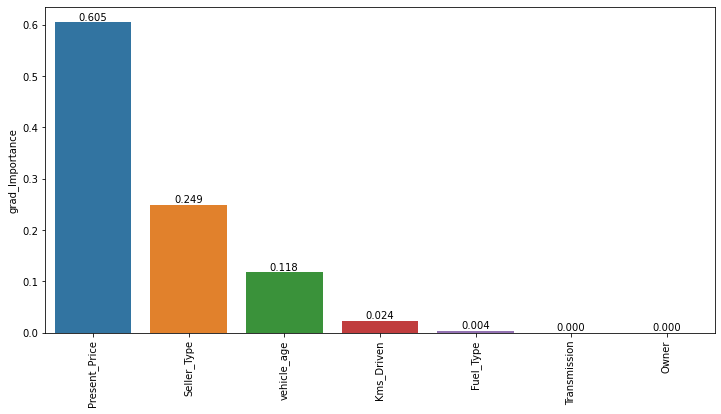

In [174]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_Importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Modeling with Pipeline for XG Boost Regressor

In [175]:
#!pip install --upgrade pip

In [176]:
#!pip install xgboost==0.90

In [177]:
import xgboost as xgb

xgb.__version__

'0.90'

In [178]:
from xgboost import XGBRegressor

operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(random_state=101, 
                                                                           objective="reg:squarederror"))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(objective='reg:squarederror', random_state=101))])

In [179]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.988654,0.971464
mae,0.200848,0.325477
mse,0.078267,0.233633
rmse,0.279762,0.483356


In [180]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(random_state=101, 
                                                                           objective="reg:squarederror"))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10,
                       return_train_score=True)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                              0.932878
train_r2                             0.989947
test_neg_mean_absolute_error        -0.441457
train_neg_mean_absolute_error       -0.187495
test_neg_mean_squared_error         -0.428459
train_neg_mean_squared_error        -0.069282
test_neg_root_mean_squared_error    -0.629648
train_neg_root_mean_squared_error   -0.262861
dtype: float64

## Gridsearch for XGBoost

In [181]:
param_grid = {"XGB_model__n_estimators":[50, 100],
              "XGB_model__max_depth":[1, 2], 
              "XGB_model__learning_rate": [0.07, 0.08],
              "XGB_model__subsample": [0.8, 1], 
              "XGB_model__colsample_bytree":[0.5, 0.8, 1],
              }

In [182]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(random_state=101, 
                                                                           objective="reg:squarederror"))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True)

In [183]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBRegressor(objective='reg:squarederror',
                                                     random_state=101))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.5, 0.8, 1],
                         'XGB_model__learning_rate': [0.07, 0.08],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [50, 100],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [184]:
grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.08,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 100,
 'XGB_model__subsample': 0.8}

In [185]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(learning_rate=0.08, max_depth=2,
                              objective='reg:squarederror', random_state=101,
                              subsample=0.8))])

In [186]:
grid_model.best_index_

46

In [187]:
pd.DataFrame(grid_model.cv_results_).loc[46, ["mean_test_score", "mean_train_score"]]

mean_test_score    -0.655563
mean_train_score   -0.400535
Name: 46, dtype: object

In [188]:
grid_model.best_score_

-0.6555628909605321

In [189]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.974186,0.967224
mae,0.318810,0.389297
mse,0.178072,0.268348
rmse,0.421986,0.518023


## Feature importance

In [190]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(learning_rate=0.08, max_depth=2, 
                                        objective='reg:squarederror',random_state=101, subsample=0.8))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(learning_rate=0.08, max_depth=2,
                              objective='reg:squarederror', random_state=101,
                              subsample=0.8))])

In [191]:
pipe_model["XGB_model"].feature_importances_

array([0.03665121, 0.21006407, 0.00558906, 0.54673314, 0.05731026,
       0.        , 0.14365232], dtype=float32)

In [192]:
pipe_model["OrdinalEncoder"].get_feature_names_out()

array(['ordinalencoder__Fuel_Type', 'ordinalencoder__Seller_Type',
       'ordinalencoder__Transmission', 'remainder__Present_Price',
       'remainder__Kms_Driven', 'remainder__Owner',
       'remainder__vehicle_age'], dtype=object)

In [193]:
new_features

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'vehicle_age']

In [194]:
imp_feats = pd.DataFrame(data=pipe_model["XGB_model"].feature_importances_, columns=['xgb_Importance'], index=new_features)
xgb_imp_feats = imp_feats.sort_values('xgb_Importance', ascending=False)
xgb_imp_feats

,xgb_Importance
Present_Price,0.546733
Seller_Type,0.210064
vehicle_age,0.143652
Kms_Driven,0.057310
Fuel_Type,0.036651
Transmission,0.005589
Owner,0.000000


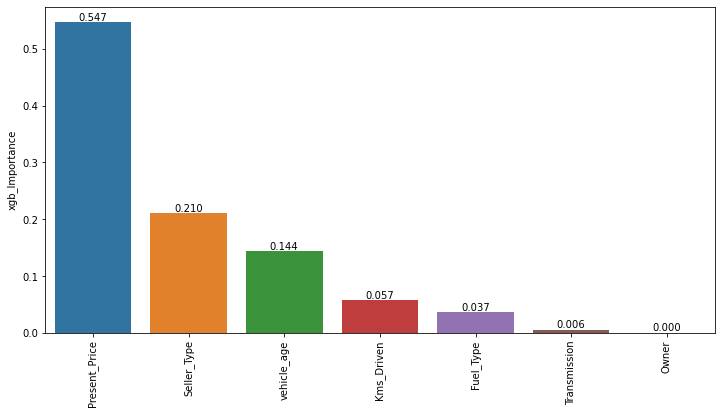

In [195]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_Importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Feature importance comparison

In [196]:
pd.concat([xgb_imp_feats, grad_imp_feats, ada_imp_feats], axis=1)

,xgb_Importance,grad_Importance,ada_Importance
Present_Price,0.546733,0.604965,0.465272
Seller_Type,0.210064,0.249496,0.065432
vehicle_age,0.143652,0.117931,0.243306
Kms_Driven,0.057310,0.023599,0.117833
Fuel_Type,0.036651,0.004010,0.097541
Transmission,0.005589,0.000000,0.007247
Owner,0.000000,0.000000,0.003370


## Feature Selection

In [197]:
X_new = df_new[["Present_Price", "Seller_Type","vehicle_age"]]
X_new.head()

,Present_Price,Seller_Type,vehicle_age
0,5.59,Dealer,8
1,9.54,Dealer,9
2,9.85,Dealer,5
3,4.15,Dealer,11
4,6.87,Dealer,8


In [198]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=101)

In [199]:
cat2 = ["Seller_Type"]

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat2), remainder='passthrough')


operations = [("OrdinalEncoder", column_trans), ("XGB_model",XGBRegressor(learning_rate=0.08, max_depth=2, objective='reg:squarederror',
             random_state=101, subsample=0.8))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train,y_train)
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.968736,0.969202
mae,0.337520,0.380770
mse,0.215661,0.252149
rmse,0.464394,0.502144


In [200]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model",XGBRegressor(learning_rate=0.08, max_depth=2, objective='reg:squarederror',
             random_state=101, subsample=0.8))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10, 
                       return_train_score=True)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                              0.932824
train_r2                             0.968948
test_neg_mean_absolute_error        -0.477676
train_neg_mean_absolute_error       -0.338175
test_neg_mean_squared_error         -0.432412
train_neg_mean_squared_error        -0.213998
test_neg_root_mean_squared_error    -0.636237
train_neg_root_mean_squared_error   -0.462171
dtype: float64

## Final Model

In [201]:
X_new.head()

,Present_Price,Seller_Type,vehicle_age
0,5.59,Dealer,8
1,9.54,Dealer,9
2,9.85,Dealer,5
3,4.15,Dealer,11
4,6.87,Dealer,8


In [202]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

cat2 = ["Seller_Type"]

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat2), remainder='passthrough')


operations = [("OrdinalEncoder", column_trans), ("XGB_model",XGBRegressor(learning_rate=0.08, max_depth=2, objective='reg:squarederror',
             random_state=101, subsample=0.8))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_new, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Seller_Type'])])),
                ('XGB_model',
                 XGBRegressor(learning_rate=0.08, max_depth=2,
                              objective='reg:squarederror', random_state=101,
                              subsample=0.8))])

In [203]:
pd.DataFrame(column_trans.fit_transform(X_new)).head()

,0,1,2
0,0.0,5.59,8.0
1,0.0,9.54,9.0
2,0.0,9.85,5.0
3,0.0,4.15,11.0
4,0.0,6.87,8.0


## Prediction

In [204]:
samples = {"Present_Price": [7, 9.5],
           "Kms_Driven": [25000, 44000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner":[0,1],
           "vehicle_age":[1, 9]}

In [205]:
df_samples = pd.DataFrame(samples)
df_samples

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,7.0,25000,Petrol,Dealer,Manual,0,1
1,9.5,44000,Diesel,Individual,Automatic,1,9


In [206]:
pipe_model.predict(df_samples)

array([5.529688 , 5.0982637], dtype=float32)